In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [3]:
data = pd.read_csv('diabetes_prediction_dataset.csv')

print(data.head())


   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [8]:
le = LabelEncoder()

data['gender'] = le.fit_transform(data['gender'])

data['smoking_history'] = le.fit_transform(data['smoking_history'])

print(data.head())


   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   
2       1  28.0             0              0                4  27.32   
3       0  36.0             0              0                1  23.45   
4       1  76.0             1              1                1  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [10]:
data['smoking_history'] = data['smoking_history'].replace(2, np.nan)

data = data.dropna()

print(data.isnull().sum())


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [12]:
X = data.drop('diabetes', axis=1)
y = data['diabetes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
model = LogisticRegression(solver='liblinear')

model.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

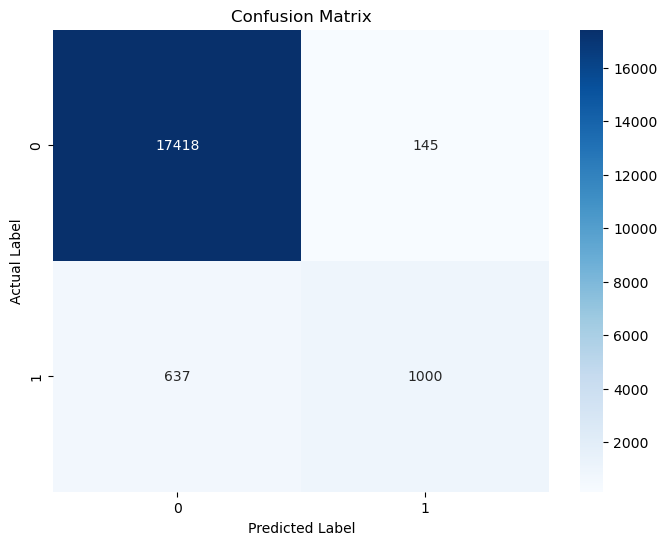

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     17563
           1       0.87      0.61      0.72      1637

    accuracy                           0.96     19200
   macro avg       0.92      0.80      0.85     19200
weighted avg       0.96      0.96      0.96     19200

Accuracy:  0.9592708333333333


In [16]:
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))


In [18]:
with open('diabetes_model.pkl', 'wb') as file:
    pickle.dump(model, file)
